<a href="https://colab.research.google.com/github/gulabpatel/TimeSeries/blob/main/Time_Series_using_FBProphet_Trend_Non_Stationary_Amazon_Revenue_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=iuwcHhGNb8A

In [1]:
!pip install fbprophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [4]:
df.sample(10)

,Quarter,Revenue,Net Income
20,3/31/2015,22717,-57
5,12/31/2018,72383,3027
13,12/31/2016,43741,749
54,9/30/2006,2307,19
60,3/31/2005,1902,78
15,6/30/2016,30404,857
57,12/31/2005,2977,199
56,3/31/2006,2279,51
51,6/30/2007,2886,78
12,3/31/2017,35714,724


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quarter     61 non-null     object
 1   Revenue     61 non-null     int64 
 2   Net Income  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


#Convert quarter into datetime

In [6]:
df['Quarter']=pd.to_datetime(df['Quarter'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [8]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [10]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Profits')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [11]:
from fbprophet import Prophet

In [12]:
amazon_df=df[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'}, axis='columns')

In [13]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [14]:
df_train=amazon_df[(amazon_df['ds'] >= '2005-03-31') & (amazon_df['ds'] <= '2019-03-31')]
df_test=amazon_df[(amazon_df['ds'] > '2019-03-31')]

In [15]:
df_train.shape

(57, 2)

In [16]:
df_test.shape

(4, 2)

In [17]:
m = Prophet(interval_width=0.95)

In [18]:
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496722,57296.724726,64997.536621
57,2019-06-30,63195.117248,59024.658111,67340.101851
58,2019-09-30,66153.769201,62113.936814,70108.388246
59,2019-12-31,74249.538212,70641.492527,78286.250775
60,2020-03-31,70663.367647,66588.625123,75221.260187


In [21]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1)

,y,yhat
ds,,
2005-03-31,1902,-638.489958
2005-06-30,1753,-1055.257099
2005-09-30,1858,-223.253205
2005-12-31,2977,6646.043035
2006-03-31,2279,912.670901
...,...,...
2019-03-31,59700,61089.496722
2019-06-30,63404,63195.117248
2019-09-30,69981,66153.769201


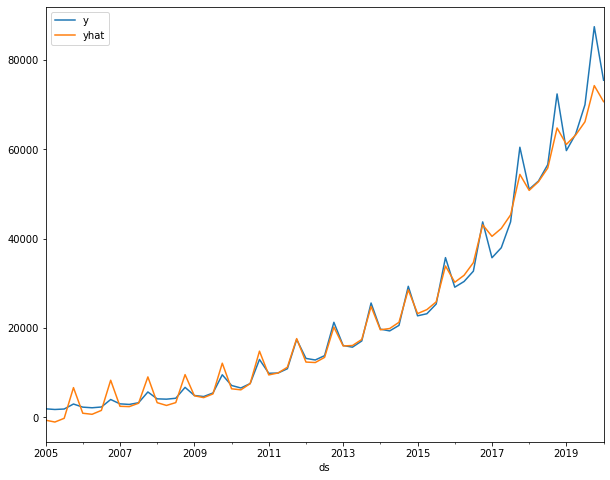

In [22]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

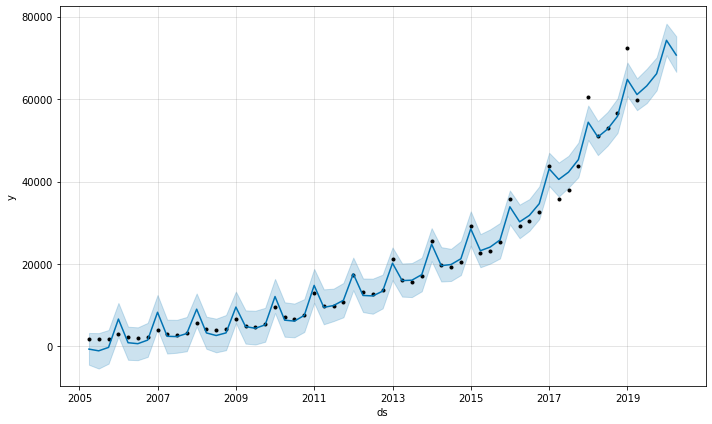

In [23]:
fig1 = m.plot(forecast)

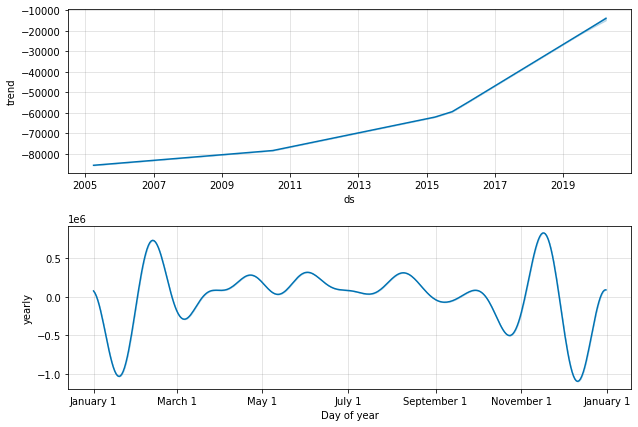

In [24]:
fig2 = m.plot_components(forecast)

In [25]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': pd.to_datetime(['	2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31',
                        '2015-12-31', '2014-12-31','2013-12-31','2012-12-31','2011-12-31','2010-12-31','2009-12-31','2008-12-31','2007-12-31',
                        '2006-12-31','2005-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})

In [26]:
holiday_sale

,holiday,ds,lower_window,upper_window
0,dec_jan_sale,2019-12-31,0,1
1,dec_jan_sale,2018-12-31,0,1
2,dec_jan_sale,2017-12-31,0,1
3,dec_jan_sale,2016-12-31,0,1
4,dec_jan_sale,2015-12-31,0,1
5,dec_jan_sale,2014-12-31,0,1
6,dec_jan_sale,2013-12-31,0,1
7,dec_jan_sale,2012-12-31,0,1
8,dec_jan_sale,2011-12-31,0,1
9,dec_jan_sale,2010-12-31,0,1


#There is multiplicative seasonality in the data

In [27]:
m2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative', holidays=holiday_sale)

In [29]:
m2.fit(df_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60098.589527,58245.140095,61868.903566
57,2019-06-30,62627.734827,60797.709609,64371.223131
58,2019-09-30,67792.982748,65909.554004,69535.789268
59,2019-12-31,89317.926197,87451.947327,91280.568175
60,2020-03-31,66836.358707,64869.051622,68834.258923


In [31]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1)

,y,yhat
ds,,
2005-03-31,1902,1731.170299
2005-06-30,1753,1806.507224
2005-09-30,1858,1995.894275
2005-12-31,2977,2734.398874
2006-03-31,2279,2268.809330
...,...,...
2019-03-31,59700,60098.589527
2019-06-30,63404,62627.734827
2019-09-30,69981,67792.982748


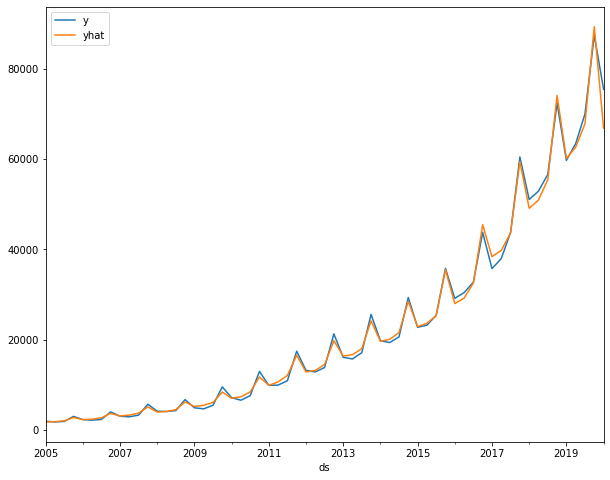

In [32]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

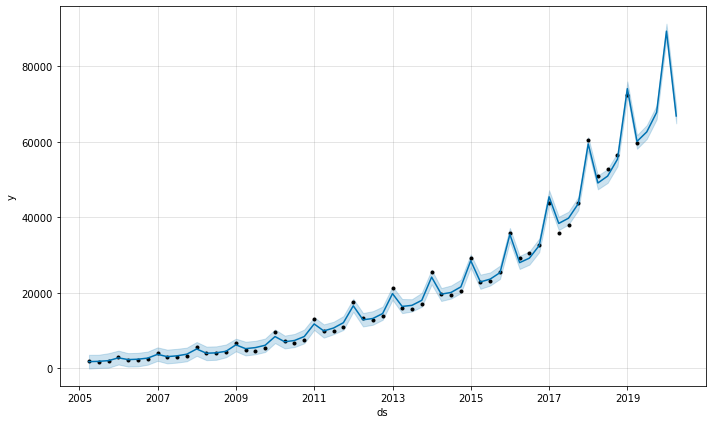

In [ ]:
fig1 = m2.plot(forecast)

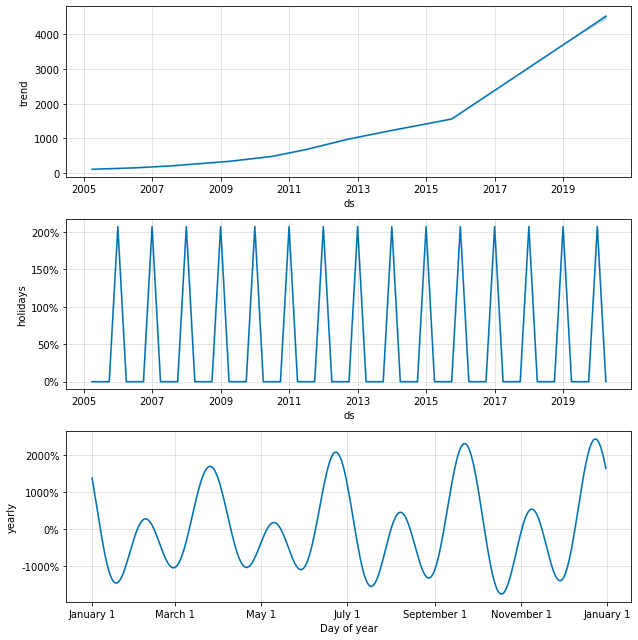

In [33]:
fig2 = m2.plot_components(forecast)